In [2]:
################## IMPORT LIBRARIES ##################
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 3)
import seaborn as sns

In [53]:
################## DEFINE FUNCTIONS ##################

def compute_and_plot_rocs(losstype, df_losses, x_range=None):
    # full reverb signal:
    data_diff_rooms=df_losses[df_losses["compared"]=="room1:room2"][losstype].tolist()
    data_same_rooms=df_losses[df_losses["compared"]=="room1a:room1b"][losstype].tolist()
    # early reflections
    data_diff_rooms_e=df_losses[df_losses["compared"]=="room1:room2 (early)"][losstype].tolist()
    data_same_rooms_e=df_losses[df_losses["compared"]=="room1a:room1b (early)"][losstype].tolist()
    # late reverb
    data_diff_rooms_l=df_losses[df_losses["compared"]=="room1:room2 (late)"][losstype].tolist()
    data_same_rooms_l=df_losses[df_losses["compared"]=="room1a:room1b (late)"][losstype].tolist()

    # Plot distribu
    plt.rcParams.update({'font.size': 8}) 
    plt.figure(figsize=(12,3))
    plt.subplot(1,4,3)
    plt.hist(data_diff_rooms, alpha=0.5,bins=50,label="room1:room2",density=True) 
    plt.hist(data_same_rooms, alpha=0.5,bins=50,label="room1a:room1b",density=True)
    if x_range!=None:
        plt.xlim(x_range)
    plt.title("Full signal")
    plt.subplot(1,4,1)
    plt.hist(data_diff_rooms_e, alpha=0.5,bins=50,label="room1:room2",density=True)
    plt.hist(data_same_rooms_e, alpha=0.5,bins=50,label="room1a:room1b",density=True)
    if x_range!=None:
        plt.xlim(x_range)
    plt.title("Early reflections")
    plt.subplot(1,4,2)
    plt.hist(data_diff_rooms_l, alpha=0.5,bins=50,label="room1:room2",density=True)
    plt.hist(data_same_rooms_l, alpha=0.5,bins=50,label="room1a:room1b",density=True)
    if x_range!=None:
        plt.xlim(x_range)
    plt.title("Late reverb")
    plt.legend()


    # Compute ROC to see if the network is able to distinguish between two enviromnents
    import sklearn.metrics as metrics
    binary_labels=[0 for i in range(len(data_same_rooms))] + [1 for i in range(len(data_diff_rooms))]
    vals=data_same_rooms+data_diff_rooms
    vals_e=data_same_rooms_e+data_diff_rooms_e
    vals_l=data_same_rooms_l+data_diff_rooms_l

    fpr, tpr, thresholds = metrics.roc_curve(binary_labels,vals)
    fpr_e, tpr_e, thresholds_e = metrics.roc_curve(binary_labels,vals_e)
    fpr_l, tpr_l, thresholds_l = metrics.roc_curve(binary_labels,vals_l)
    roc_auc = metrics.auc(fpr, tpr)
    roc_auc_e = metrics.auc(fpr_e, tpr_e)
    roc_auc_l = metrics.auc(fpr_l, tpr_l)
    plt.subplot(1,4,4)
    plt.plot(fpr,tpr,label=f"reverberant signal, AUC={roc_auc:.2f}")
    plt.plot(fpr_e,tpr_e,label=f"early reflections, AUC={roc_auc_e:.2f}")
    plt.plot(fpr_l,tpr_l,label=f"late reverb, AUC={roc_auc_l:.2f}")
    plt.title(f'ROC curve')
    plt.legend()
    plt.suptitle("Loss: " +losstype)
    plt.tight_layout()
    plt.show()

    # plt.show()
    # plt.figure()
    # plt.plot(thresholds,label=f"reverberant signal, AUC={roc_auc:.2f}")
    # plt.plot(thresholds_e,label=f"early reflections, AUC={roc_auc_e:.2f}")
    # plt.plot(thresholds_l,label=f"late reverb, AUC={roc_auc_l:.2f}")
    # plt.title(f'Thresholds\n Based on loss={losstype}')
    # plt.legend()
    # plt.show()

In [62]:
################## LOAD DATA FRAME WITH LOSS VALUES ##################
df_losses_randmic=pd.read_csv("/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-09-05-2024/eval_detection_randmicpos.csv")
df_losses_fixedmic=pd.read_csv("/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-09-05-2024/eval_detection_fixedmicpos.csv")

# Compute multi-resolution stft loss = magnitude loss + spectral convergence loss
df_losses_randmic["L_multi-stft"]=df_losses_randmic["L_multi-stft-sc"]+df_losses_randmic["L_multi-stft-mag"]
df_losses_fixedmic["L_multi-stft"]=df_losses_fixedmic["L_multi-stft-sc"]+df_losses_fixedmic["L_multi-stft-mag"]
df_losses_randmic["L_stft"]=df_losses_fixedmic["L_stft-sc"]+df_losses_fixedmic["L_stft-mag"]
df_losses_fixedmic["L_stft"]=df_losses_fixedmic["L_stft-sc"]+df_losses_fixedmic["L_stft-mag"]

# Display first 10 rows of a dataframe with losses
df_losses_randmic.head(10)

,label,idx,compared,L_multi-stft-sc,L_multi-stft-mag,L_multi-mel,L_multi-wave,L_stft-sc,L_stft-mag,L_logmel,L_wave,L_sisdr,L_srmr_1,L_srmr_2,L_pesq,L_stoi,L_emb_cos,L_emb_euc,L_multi-stft,L_stft
0,14-05-2024--23-12_c_wunet_stft_1,0,room1:room2,0.316086,0.627107,0.140706,0.044319,0.315618,0.671752,0.876051,0.055278,6.976589,3.788909,4.239367,2.276715,0.956383,0.012333,0.431371,0.943193,1.261339
1,14-05-2024--23-12_c_wunet_stft_1,0,room1:room2 (early),0.289447,0.454553,0.081778,0.040698,0.287217,0.464420,0.362157,0.050735,7.684930,4.341398,4.291925,3.238695,0.969325,0.005135,0.279744,0.744000,0.999413
2,14-05-2024--23-12_c_wunet_stft_1,0,room1:room2 (late),1.598770,1.493793,0.581614,0.028735,1.598706,1.557751,8.740893,0.036119,-25.510632,2.489781,6.006398,1.256881,0.647427,0.011584,0.436763,3.092563,3.301848
3,14-05-2024--23-12_c_wunet_stft_1,0,room1a:room1b,0.308683,0.585641,0.126126,0.046415,0.305499,0.599340,0.617432,0.067269,5.165019,3.788909,5.272465,2.553021,0.926049,0.004800,0.266997,0.894324,0.896092
4,14-05-2024--23-12_c_wunet_stft_1,0,room1a:room1b (early),0.269165,0.526239,0.133271,0.043657,0.265063,0.534315,0.652828,0.064534,6.935427,4.341398,6.504234,2.957182,0.954467,0.007960,0.344468,0.795404,0.745102
5,14-05-2024--23-12_c_wunet_stft_1,0,room1a:room1b (late),0.603130,0.724008,0.170500,0.013243,0.608448,0.714477,1.177785,0.012036,-18.444334,2.489781,2.558872,1.405165,0.630859,0.004680,0.290091,1.327139,1.308555
6,14-05-2024--23-12_c_wunet_stft_1,0,prediction:target,0.340331,0.582985,0.128578,0.052374,0.337238,0.609031,0.725954,0.065022,7.567456,4.511315,4.239367,2.554473,0.952931,0.006719,0.319842,0.923316,1.138832
7,14-05-2024--23-12_c_wunet_stft_1,0,prediction:content,0.231918,0.312648,0.101558,0.033419,0.236300,0.341524,0.419606,0.037571,9.793440,4.511315,3.788909,3.488325,0.971341,0.007565,0.337637,0.544565,0.607446
8,14-05-2024--23-12_c_wunet_stft_1,1,room1:room2,0.451015,0.648333,0.182776,0.049133,0.447022,0.658699,1.711516,0.058810,2.490037,4.201978,5.761597,1.879950,0.849194,0.011672,0.411334,1.099348,1.219557
9,14-05-2024--23-12_c_wunet_stft_1,1,room1:room2 (early),0.422024,0.529934,0.126014,0.049144,0.420791,0.534387,0.812912,0.062143,3.471748,4.422055,7.172596,2.112414,0.885052,0.007249,0.325565,0.951958,0.995353


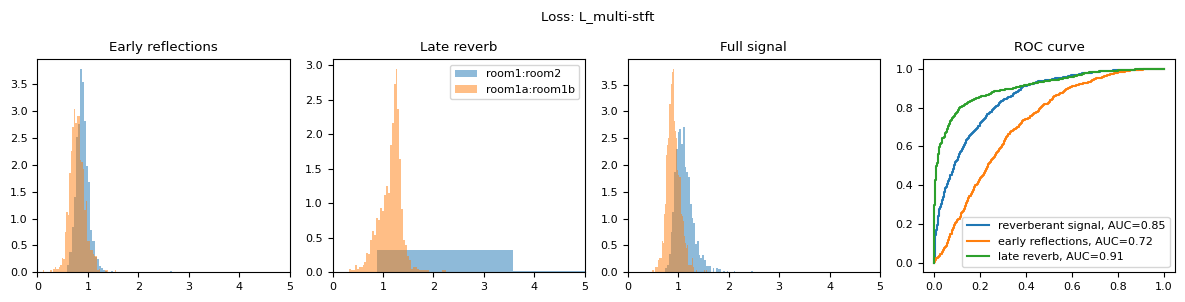

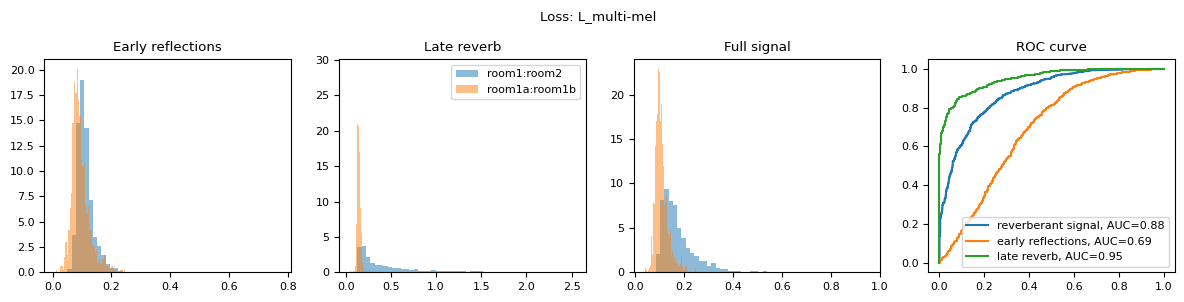

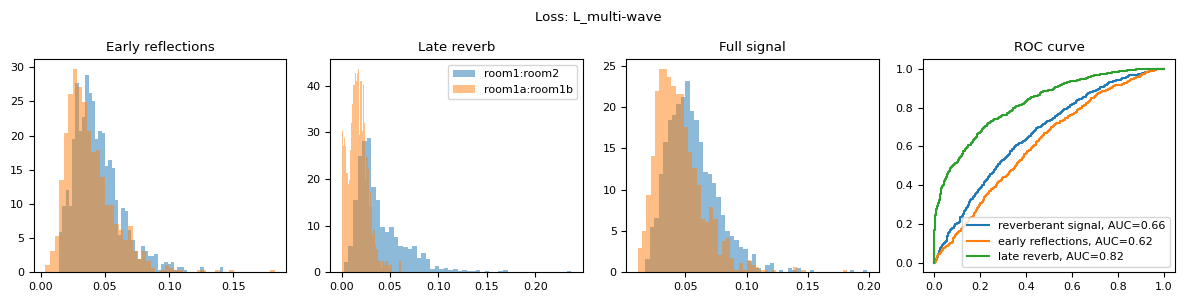

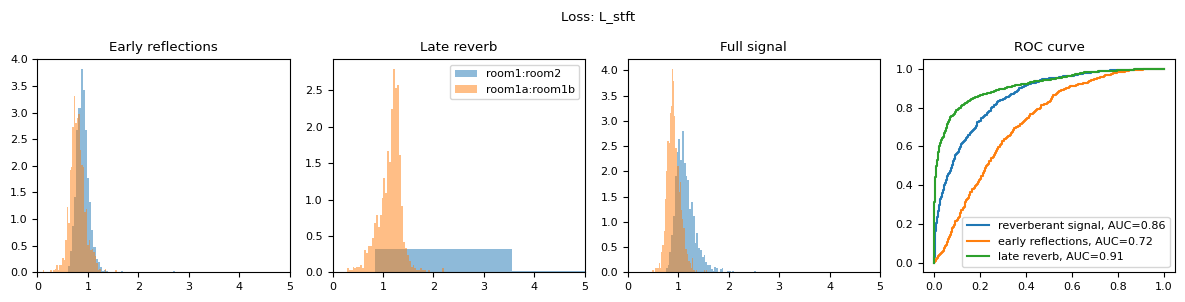

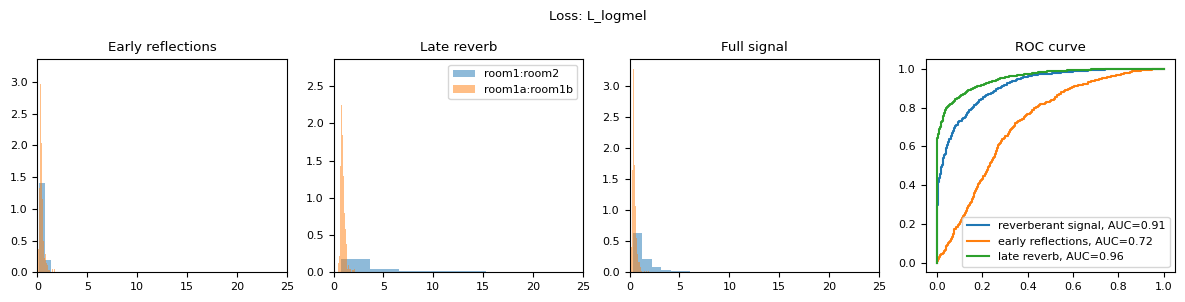

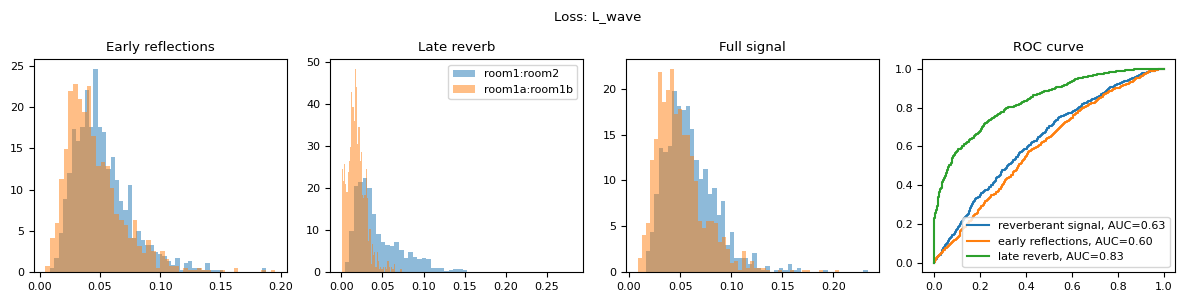

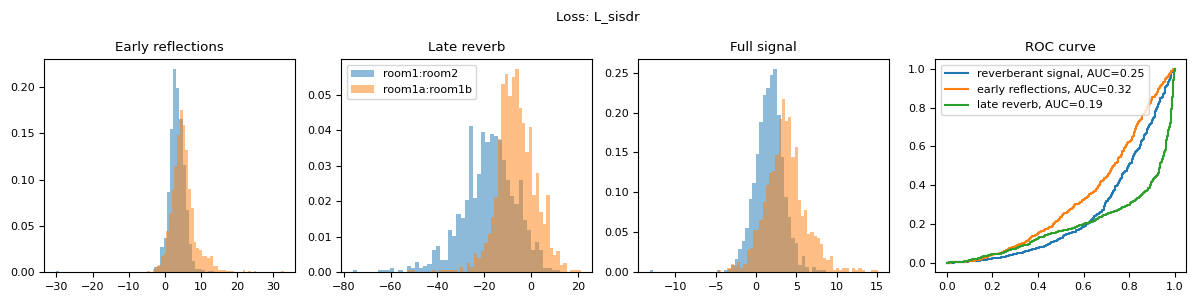

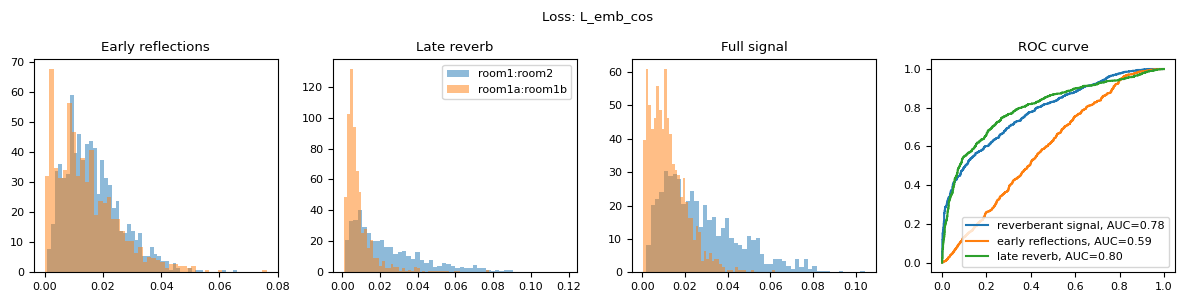

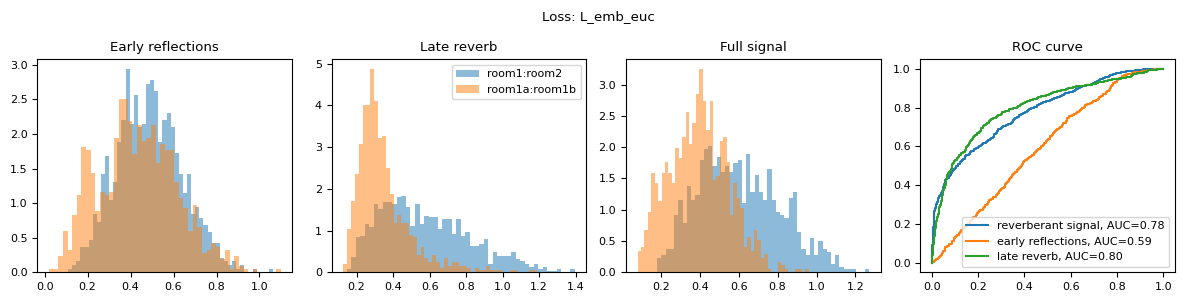

In [63]:
################## PLOT DISTRIBUTION OF VALUES &  ROC CURVES ##################
################# PAIRS WITH FIXED SRC_REC DISTANCE DISTANCE ##################
compute_and_plot_rocs("L_multi-stft", df_losses_fixedmic,x_range=(0,5))
compute_and_plot_rocs("L_multi-mel", df_losses_fixedmic)
compute_and_plot_rocs("L_multi-wave", df_losses_fixedmic)

compute_and_plot_rocs("L_stft", df_losses_fixedmic,x_range=(0,5))
compute_and_plot_rocs("L_logmel", df_losses_fixedmic,x_range=(0,25))
compute_and_plot_rocs("L_wave", df_losses_fixedmic)


compute_and_plot_rocs("L_sisdr", df_losses_fixedmic)
compute_and_plot_rocs("L_emb_cos", df_losses_fixedmic)
compute_and_plot_rocs("L_emb_euc", df_losses_fixedmic)



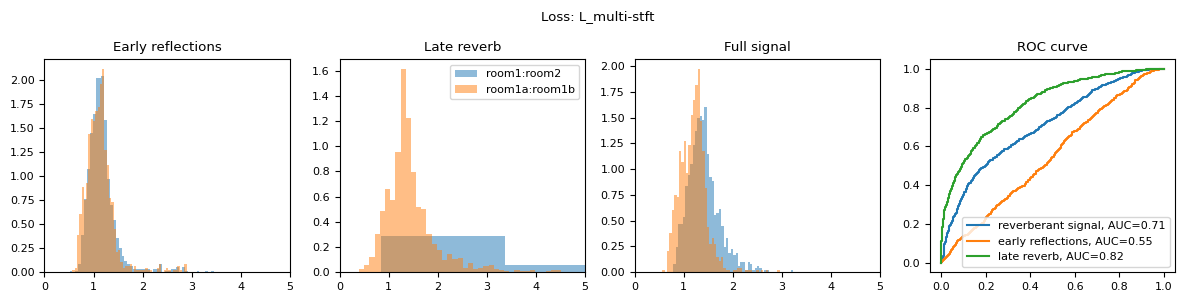

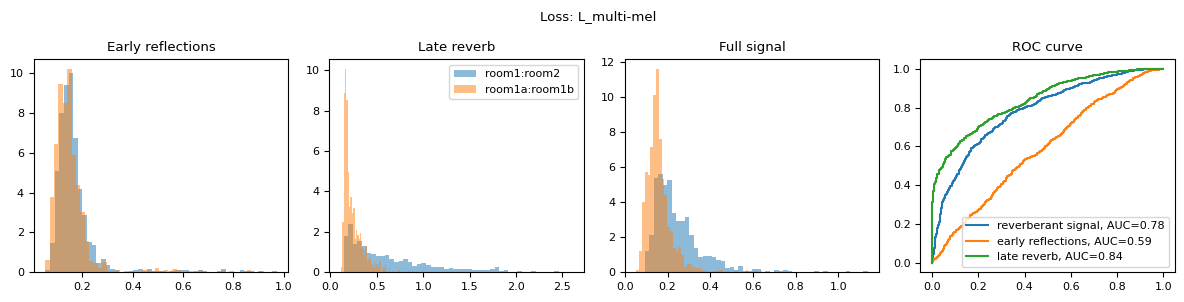

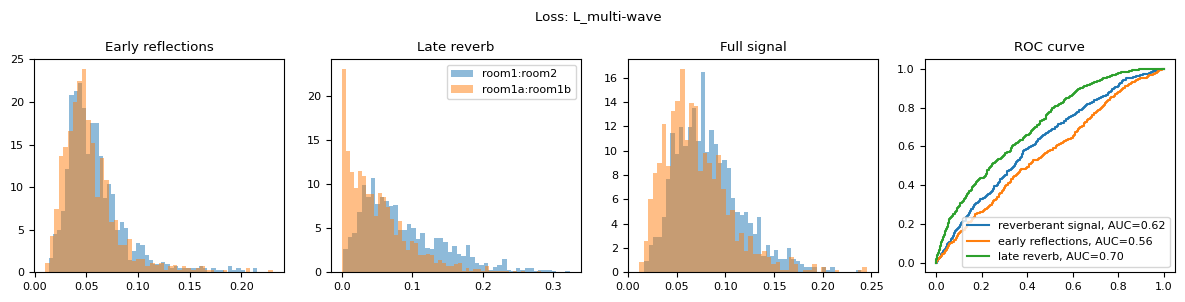

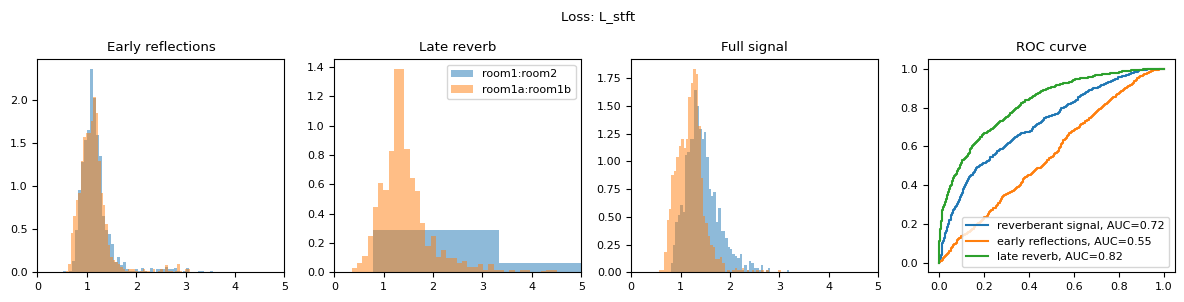

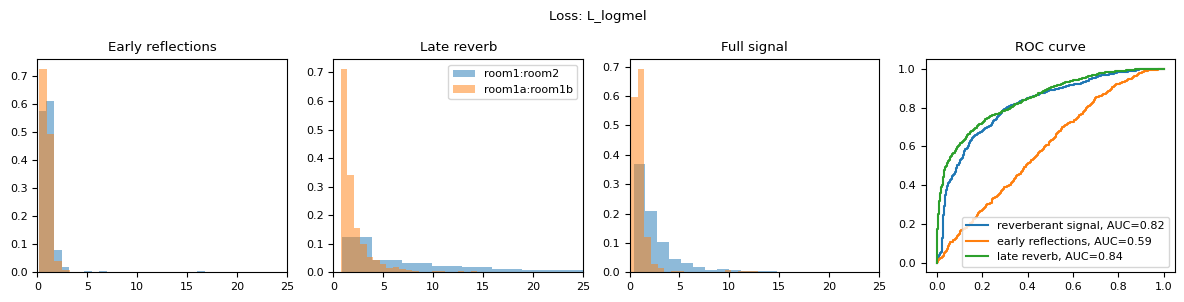

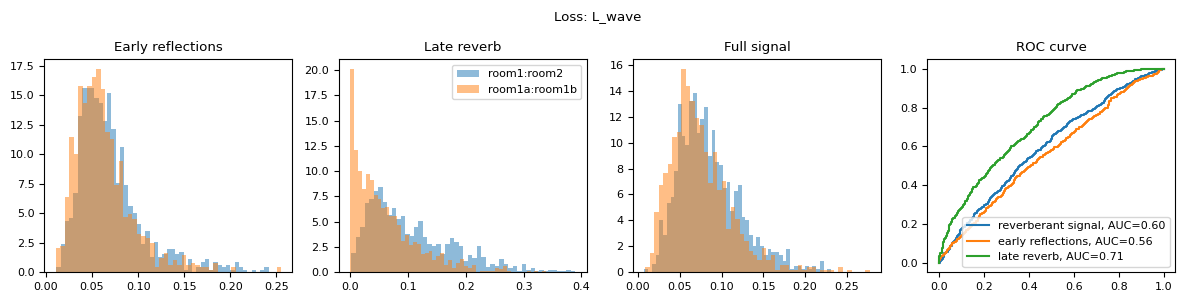

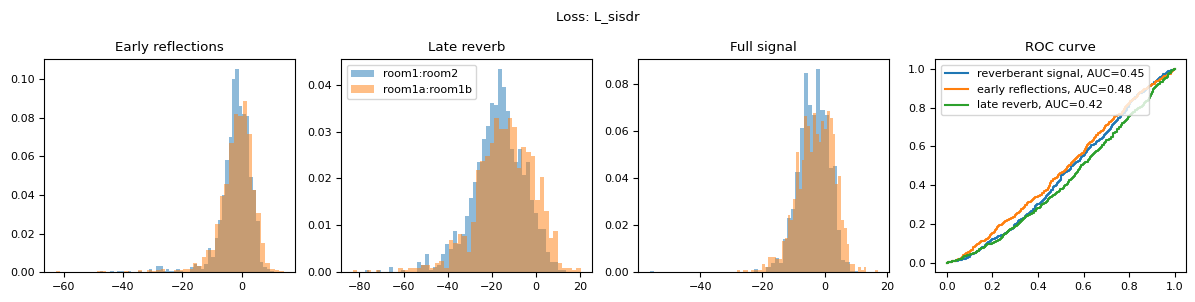

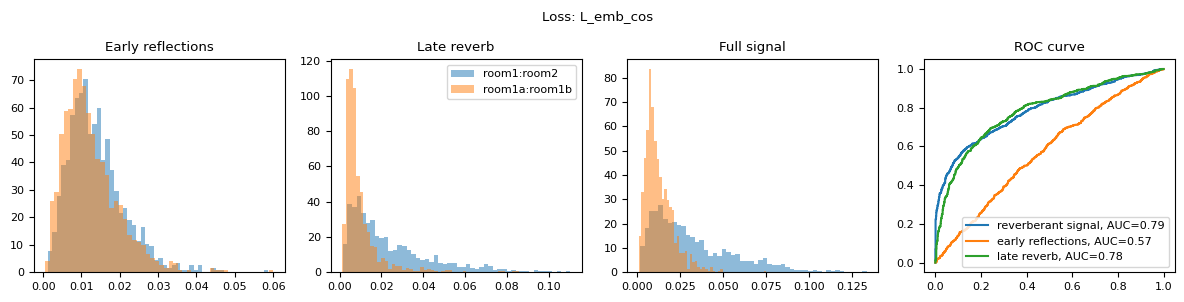

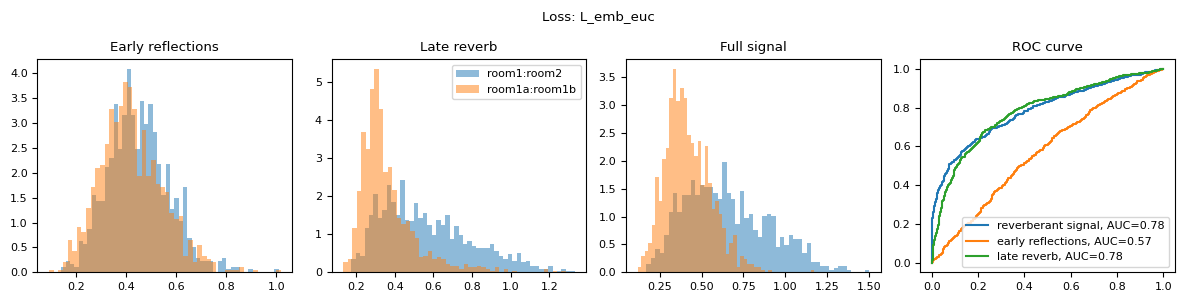

In [59]:
################## PLOT DISTRIBUTION OF VALUES &  ROC CURVES ##################
################# PAIRS WITH FIXED SRC_REC DISTANCE DISTANCE ##################

compute_and_plot_rocs("L_multi-stft", df_losses_randmic,x_range=(0,5))
compute_and_plot_rocs("L_multi-mel", df_losses_randmic)
compute_and_plot_rocs("L_multi-wave", df_losses_randmic)

compute_and_plot_rocs("L_stft", df_losses_randmic,x_range=(0,5))
compute_and_plot_rocs("L_logmel", df_losses_randmic,x_range=(0,25))
compute_and_plot_rocs("L_wave", df_losses_randmic)


compute_and_plot_rocs("L_sisdr", df_losses_fixedmic)
compute_and_plot_rocs("L_emb_cos", df_losses_fixedmic)
compute_and_plot_rocs("L_emb_euc", df_losses_fixedmic)


In [23]:
# df_losses[df_losses["compared"=="target:content"]]

KeyError: False

In [16]:
losstype="L_wav_L2"





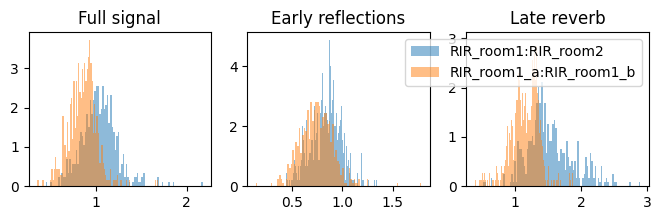

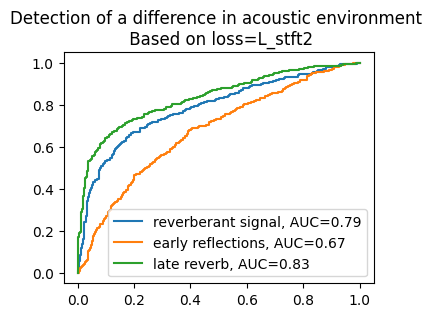

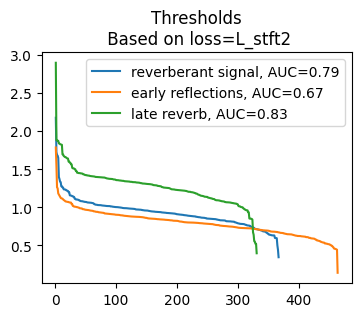

In [17]:
compute_and_plot_rocs("L_stft2", df_losses)

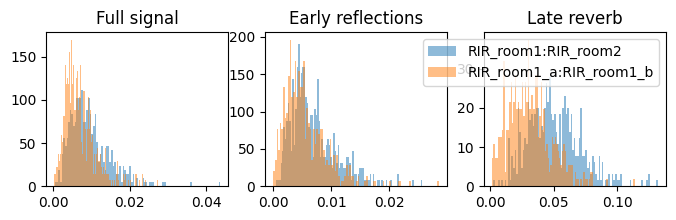

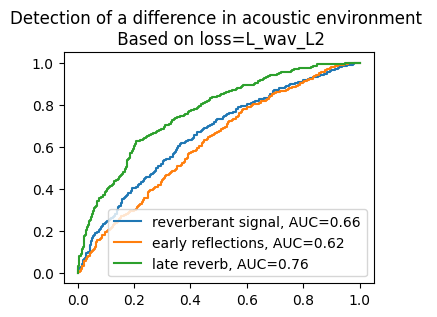

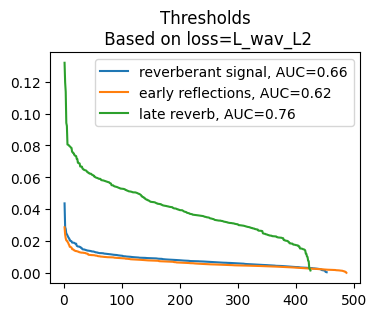

In [18]:
compute_and_plot_rocs("L_wav_L2", df_losses)

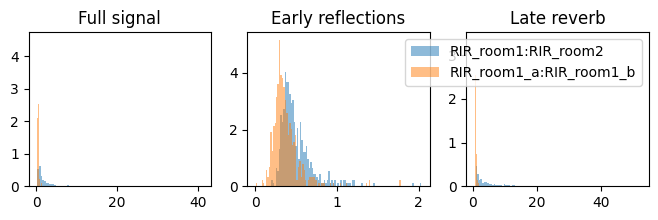

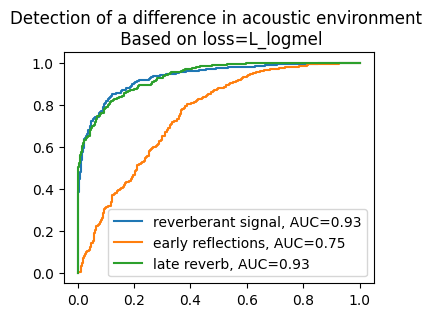

In [12]:
compute_and_plot_rocs("L_logmel", df_losses)

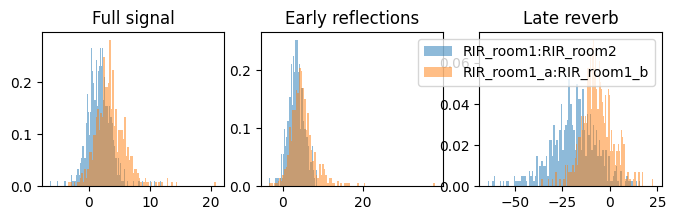

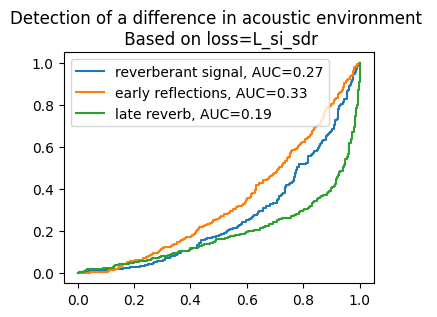

In [14]:
compute_and_plot_rocs("L_si_sdr", df_losses)